<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/AdvancedUnivariateModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FBprophet Univariate Time Series Modelling**

In [1]:
!pip -q install prophet

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
#data
urlA = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/avocado.csv'

df = pd.read_csv(urlA).drop(columns=["Unnamed: 0"])
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### **Create training dataset**

In [4]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(df["Date"])
train_df['y'] = df.iloc[:,1]
train_df.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [5]:
#initalizing basic prophet model
basic_prophet_model = Prophet()
basic_prophet_model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/tsynu_e7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/hezvxphs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61726', 'data', 'file=/tmp/tmpl8adg7iz/tsynu_e7.json', 'init=/tmp/tmpl8adg7iz/hezvxphs.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_modelo84w254k/prophet_model-20240616202252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future_df = basic_prophet_model.make_future_dataframe(periods=300)
future_df.tail()

,ds
464,2019-01-15
465,2019-01-16
466,2019-01-17
467,2019-01-18
468,2019-01-19


In [7]:
forecast_df = basic_prophet_model.predict(future_df)

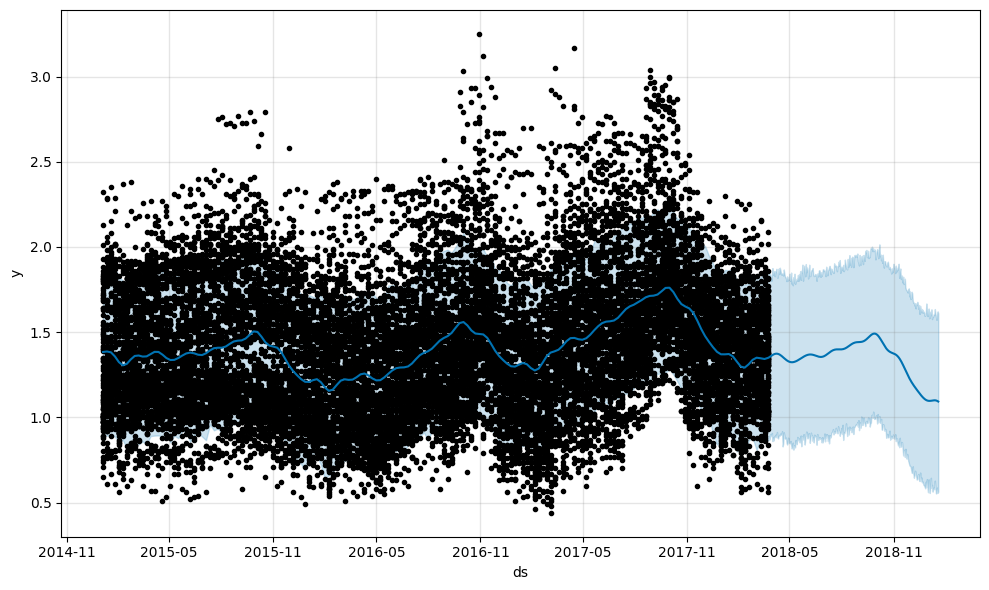

In [8]:
plot1 = basic_prophet_model.plot(forecast_df)

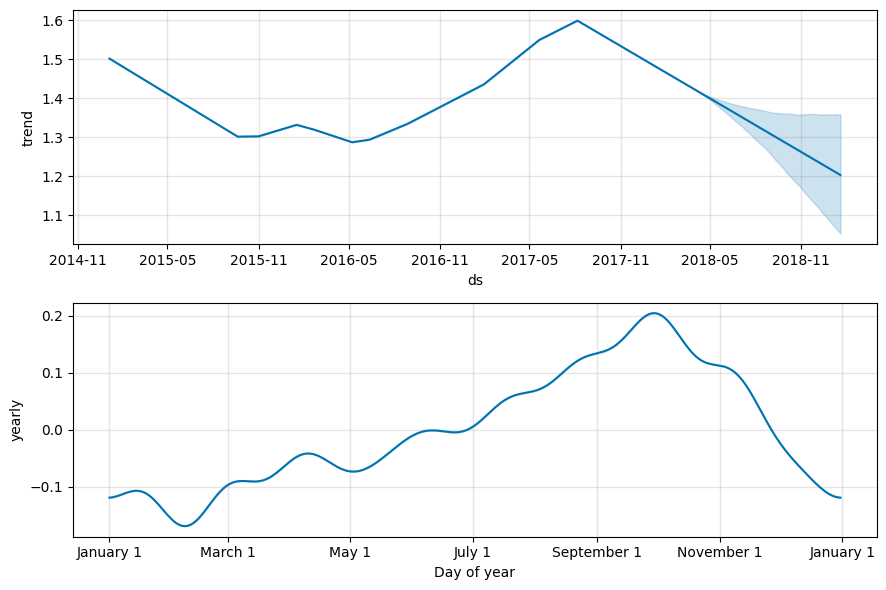

In [9]:
#plotting the forecast components
plot2 = basic_prophet_model.plot_components(forecast_df)

# **Prophet Modelling by Controlling the change points**

One of the key features of Prophet is its ability to handle change points — times when the time series data experiences sudden changes in its trajectory. By default, Prophet automatically detects these change points and adjusts the trend accordingly. However, you can exert more control over this behavior:

- Specifying the Number of Change Points: By default, Prophet detects 25 change points in the first 80% of the time series, but you can change this setting.

- Adjusting the Sensitivity to Change Points: This is done using the changepoint_prior_scale parameter. A higher value will allow the model to fit larger shifts more closely, while a lower value will smooth these shifts.

- Manually Specifying Change Points: If you know certain dates where change points occur (e.g., a major event that would affect your time series data), you can specify these manually.

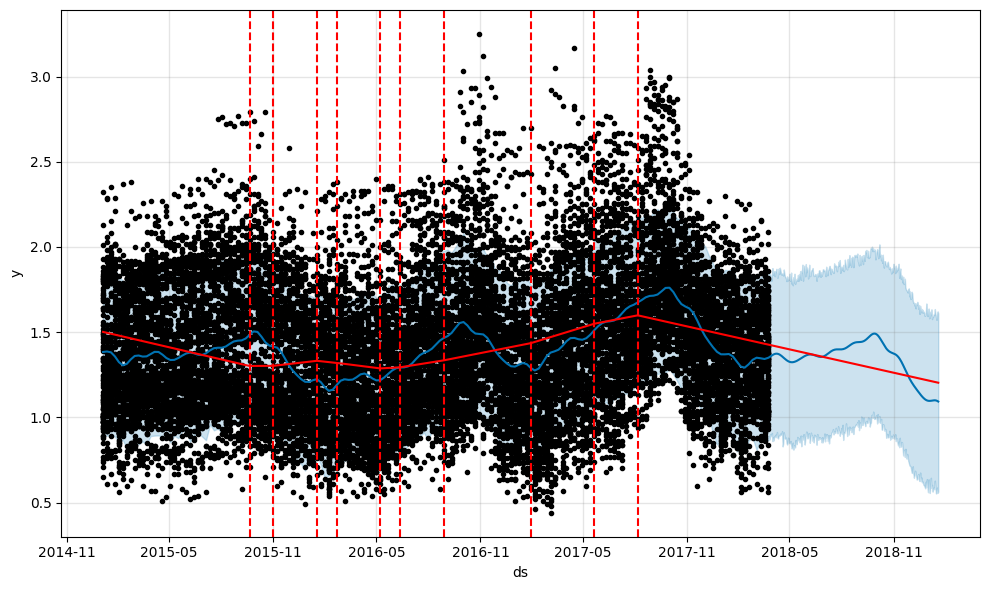

In [10]:
plot3 = basic_prophet_model.plot(forecast_df)
adding_changepoints = add_changepoints_to_plot(plot3.gca(), basic_prophet_model, forecast_df)

In [11]:
basic_prophet_model.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

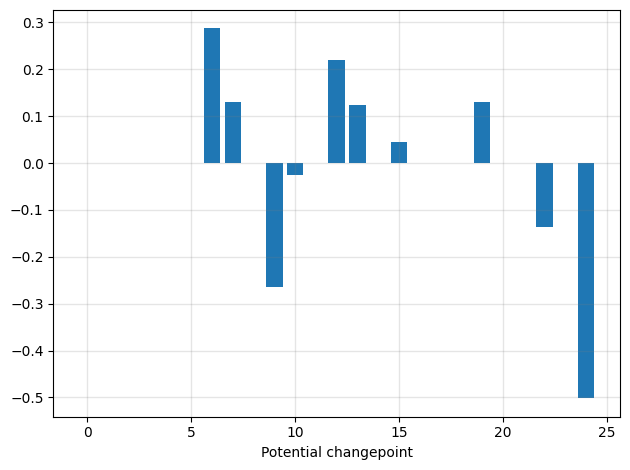

In [12]:
#checking the magnitude of each changepoint
deltas = basic_prophet_model.params['delta'].mean(0)
plot4 = plt.figure(facecolor='w')
ax = plot4.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_xlabel('Potential changepoint')
plot4.tight_layout()

### **Tweak the n_changepoints hyperparameter and forecasting**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/u8w0mdfc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/l9yhwidq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24584', 'data', 'file=/tmp/tmpl8adg7iz/u8w0mdfc.json', 'init=/tmp/tmpl8adg7iz/l9yhwidq.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_modelootj9x2g/prophet_model-20240616204651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:46:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


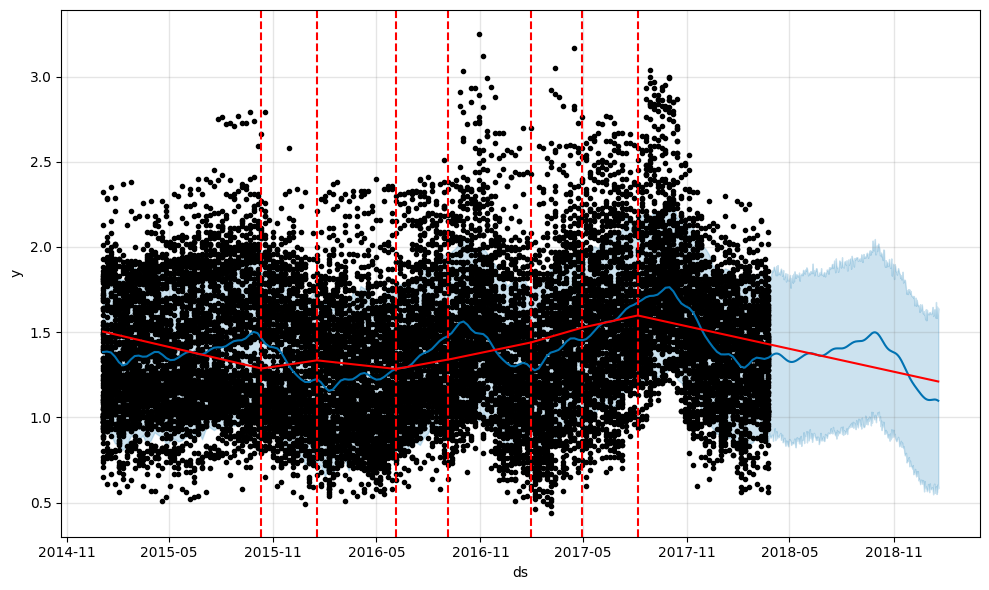

In [13]:
prophet_model_changepoint = Prophet(n_changepoints=20, yearly_seasonality=True)

#getting forecast
forecast_df_changepoint = prophet_model_changepoint.fit(train_df).predict(future_df)

plot5 = prophet_model_changepoint.plot(forecast_df_changepoint)
adding_changepoints = adding_changepoints = add_changepoints_to_plot(plot5.gca(), prophet_model_changepoint, forecast_df_changepoint)

### **Tweak the changepoint_range hyperparameter and forecasting**

- changepoint_range=0.9 makes the model more sensitive to changes that might occur later in the time series (up to 90% of the way through the data provided). This can be useful if you expect significant shifts or structural changes in the later stages of the series and want to ensure the model is allowed to adjust its trend accordingly.
- yearly_seasonality=True ensures that the model accounts for annual patterns, which is particularly important for datasets where events or trends repeat on a yearly cycle, such as sales data influenced by holidays or seasonal weather patterns.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/t7ilm7p9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/1me2rea9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98633', 'data', 'file=/tmp/tmpl8adg7iz/t7ilm7p9.json', 'init=/tmp/tmpl8adg7iz/1me2rea9.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_model1wip5l5m/prophet_model-20240616205343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


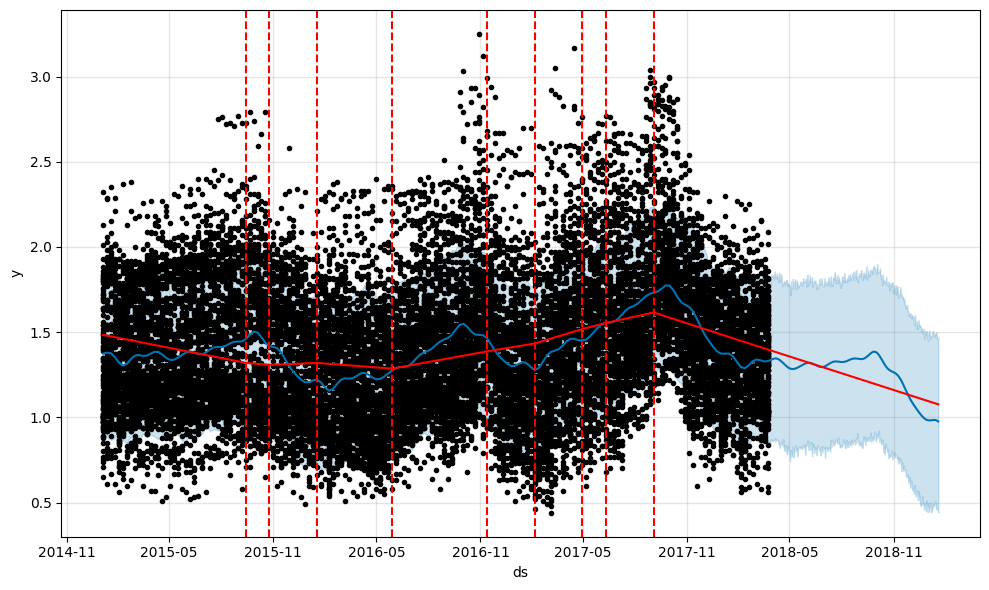

In [14]:
prophet_model_changepoint2 = Prophet(changepoint_range=0.9, yearly_seasonality=True)

#getting forecast
forecast_df_changepoint2 = prophet_model_changepoint2.fit(train_df).predict(future_df)

plot6 = prophet_model_changepoint2.plot(forecast_df_changepoint2)
adding_changepoints = add_changepoints_to_plot(plot6.gca(), prophet_model_changepoint2, forecast_df_changepoint2)

# **Prophet modelling by Adjusting Trends**
- changepoint_prior_scale

In [15]:
prophet_model_trend = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/1jfgguyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/xhaj9rvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26236', 'data', 'file=/tmp/tmpl8adg7iz/1jfgguyj.json', 'init=/tmp/tmpl8adg7iz/xhaj9rvn.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_model7c6qq47e/prophet_model-20240616210727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:07:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:07:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


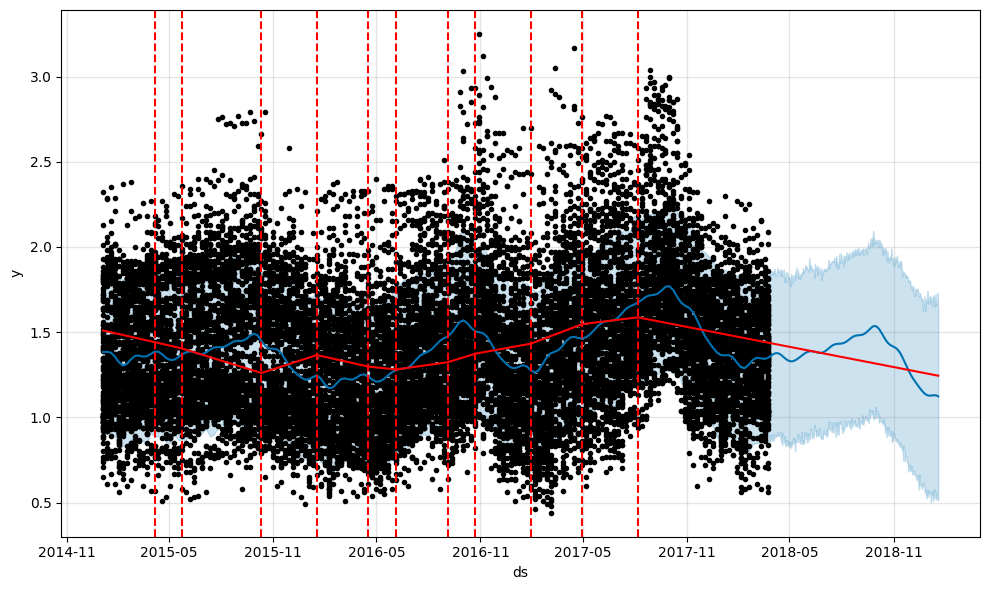

In [16]:
#getting the forecast
forecast_df_trend = prophet_model_trend.fit(train_df).predict(future_df)
#plotting
plot7 = prophet_model_trend.plot(forecast_df_trend)
adding_changepoints = add_changepoints_to_plot(plot7.gca(), prophet_model_trend, forecast_df_trend)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/bx6qjjob.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/uammu3a6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8533', 'data', 'file=/tmp/tmpl8adg7iz/bx6qjjob.json', 'init=/tmp/tmpl8adg7iz/uammu3a6.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_modelaj95f_dl/prophet_model-20240616211040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:10:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


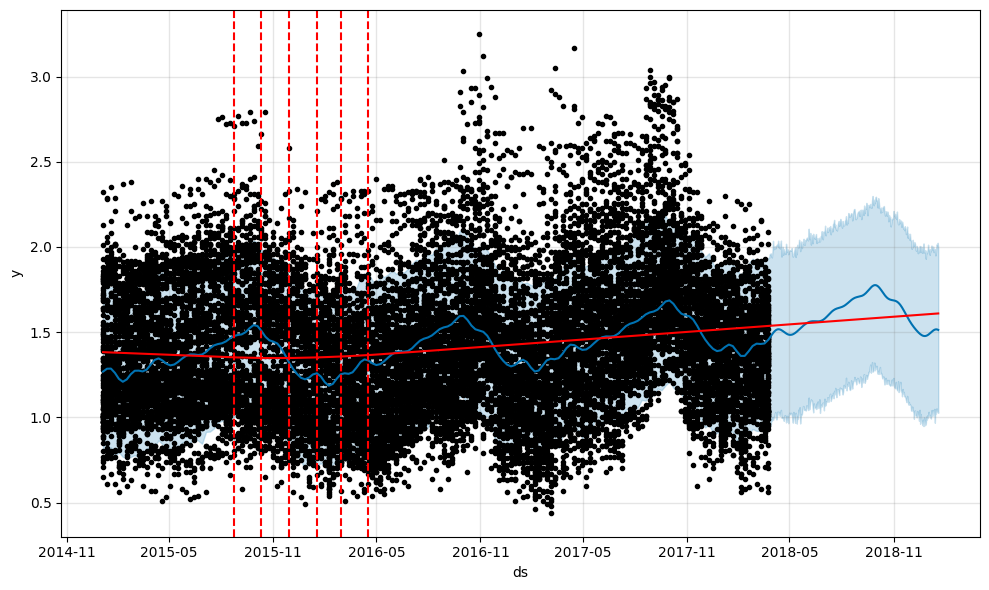

In [17]:
#decreasing the changepoint_prior_scale
prophet_model_trend2 = Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)

#getting the forecast
forecast_df_trend2 = prophet_model_trend2.fit(train_df).predict(future_df)
#plotting
plot8 = prophet_model_trend2.plot(forecast_df_trend2)
adding_changepoints = add_changepoints_to_plot(plot8.gca(), prophet_model_trend2, forecast_df_trend2)


# **Prophat Modeling with Holidays**

In [18]:
# custom holiday dataframe
holidays_df = pd.DataFrame({
    'holiday':'avacado season',
    'ds': pd.to_datetime(['2014-07-31', '2014-09-16',
                          '2015-07-31', '2015-09-16',
                          '2016-07-31', '2016-09-16',
                          '2017-07-31', '2017-09-16',
                          '2018-07-31', '2018-09-16',
                          '2019-07-31', '2019-09-16',]),
    'lower_window': -1,
    'upper_window': 0,
})

In [20]:
prophet_model_holiday = Prophet(holidays=holidays_df)
prophet_model_holiday.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/wx5o48kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/vq_ptlh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98727', 'data', 'file=/tmp/tmpl8adg7iz/wx5o48kc.json', 'init=/tmp/tmpl8adg7iz/vq_ptlh7.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_modeltnevd6dp/prophet_model-20240616212405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:24:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:24:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
future_df = prophet_model_holiday.make_future_dataframe(periods=12, freq='m')

In [24]:
forecast_df = prophet_model_holiday.predict(future_df)

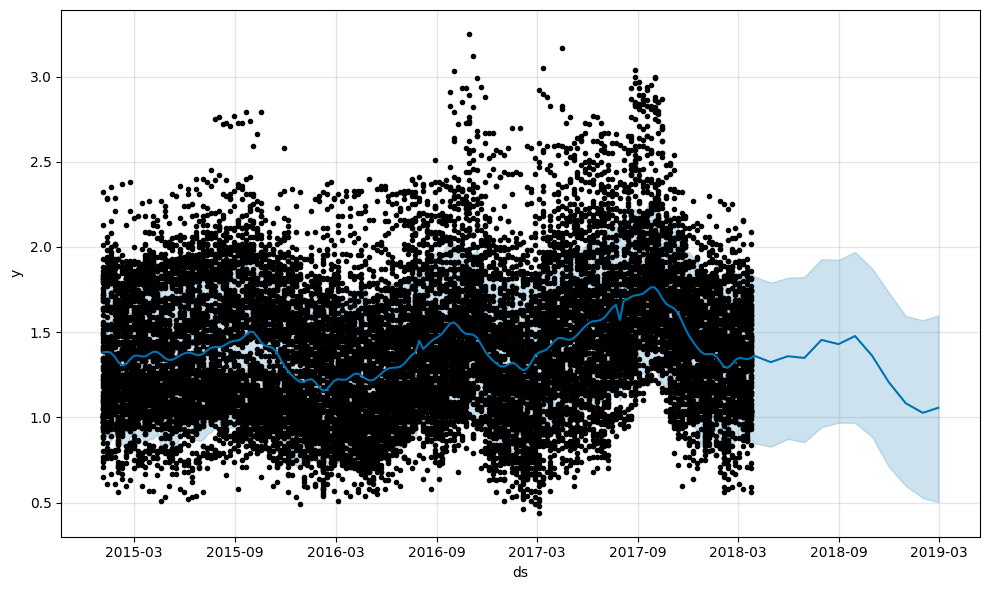

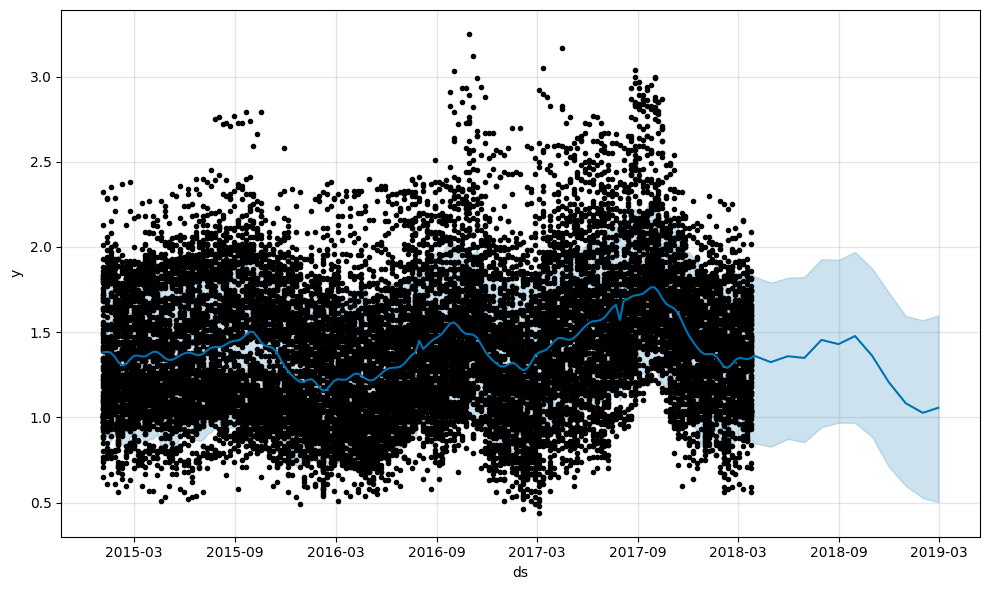

In [25]:
prophet_model_holiday.plot(forecast_df)

# **Prophet Modeling with Added Regressors**
Prophet allows the inclusion of additional regressors to enhance forecasting accuracy. This feature is useful when other variables, besides time, significantly influence the forecast target. Adding these regressors can help capture the effects of external factors, potentially improving the model's accuracy.

### How to Add Regressors in Prophet

1. **Selecting Regressors:**
   Identify variables that have a predictive relationship with the forecast variable. These could include marketing spend, weather conditions, economic indicators, etc.

2. **Preparing the Data:**
   Ensure each regressor is included as a column in the DataFrame passed to Prophet. The DataFrame should have columns for the regressors with values for each timestamp in the `ds` column.

3. **Adding Regressors to the Model:**
   Use the `add_regressor()` method on the Prophet object for each regressor. Additional options per regressor can be specified to tailor the model further.


In [26]:
#label and encode the type column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,10] = le.fit_transform(df.iloc[:,10])
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany


In [30]:
data = df[["Date", 'Total Volume', '4046', '4225', '4770', 'Small Bags', 'type']].copy()
data.rename(columns={'Date': 'ds'}, inplace=True)
data['y'] = df.iloc[:, 1].copy()


In [31]:
train_df = data[:18000]
test_df = data[18000:]

In [32]:
prophet_model_regressor = Prophet()
prophet_model_regressor.add_regressor('type')
prophet_model_regressor.add_regressor('Total Volume')
prophet_model_regressor.add_regressor('4046')
prophet_model_regressor.add_regressor('4225')
prophet_model_regressor.add_regressor('4770')
prophet_model_regressor.add_regressor('Small Bags')


In [33]:
prophet_model_regressor.fit(train_df)
future_df = prophet_model_regressor.make_future_dataframe(periods=249)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/sww0a37p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl8adg7iz/aj8mkpgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38471', 'data', 'file=/tmp/tmpl8adg7iz/sww0a37p.json', 'init=/tmp/tmpl8adg7iz/aj8mkpgf.json', 'output', 'file=/tmp/tmpl8adg7iz/prophet_modelaq8upqf0/prophet_model-20240616214658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:46:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


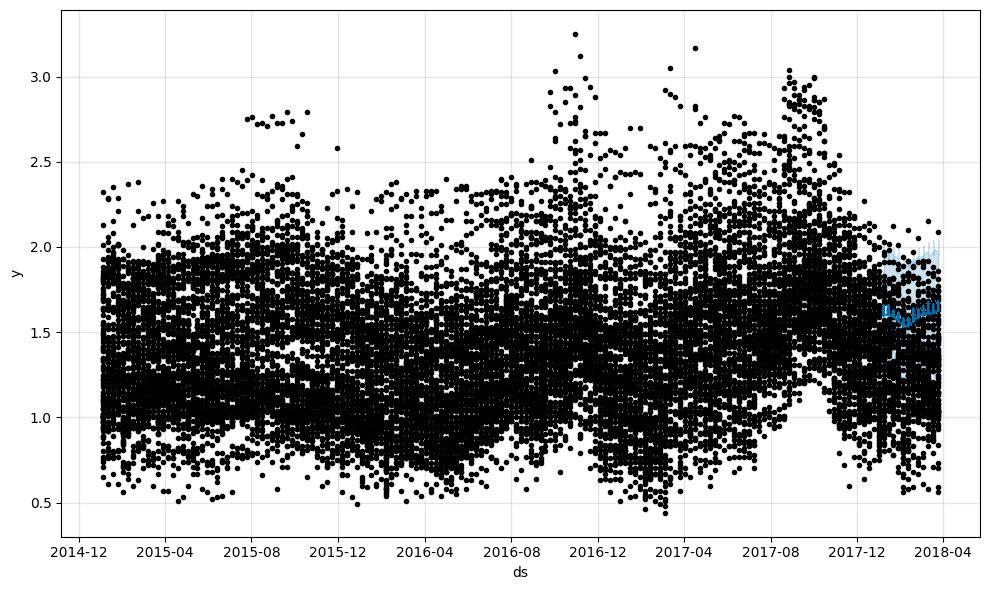

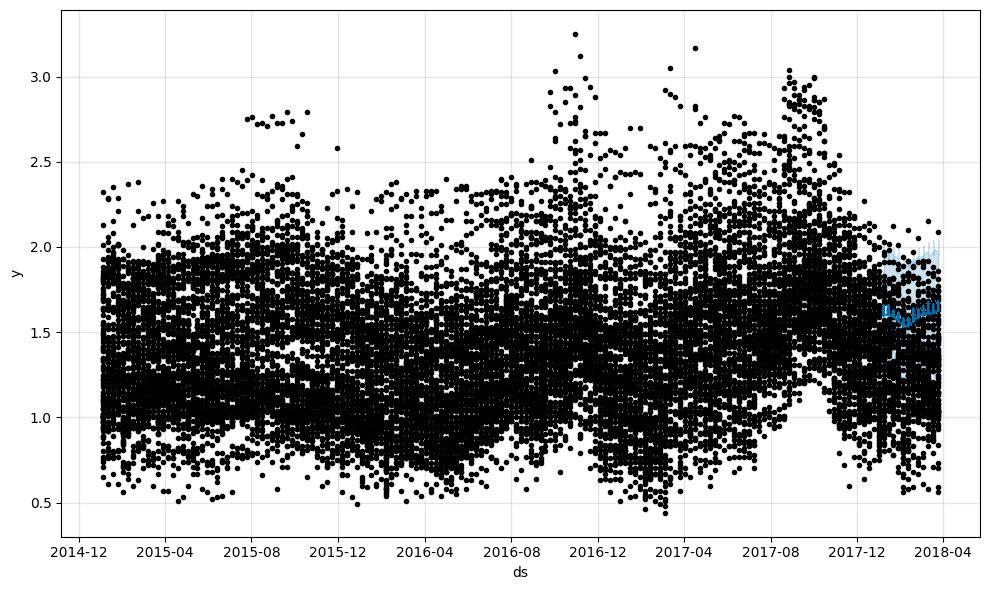

In [34]:
forecast_df = prophet_model_regressor.predict(test_df)
prophet_model_regressor.plot(forecast_df)

# **Time Series Forecasting using Auto-ARIMA**

In [35]:
!pip -q install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [36]:
import pandas as pd
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [54]:
auto_arima_data = pd.read_csv('sample_data/champagne.txt',sep=',')

# Display the first few rows of the DataFrame
auto_arima_data.head()

,Month,Champagne_Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [55]:
#check missing values
auto_arima_data.isnull().sum()

Month              0
Champagne_Sales    0
dtype: int64

In [56]:
auto_arima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            105 non-null    object
 1   Champagne_Sales  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [57]:
#convert object to datetime and set index
auto_arima_data['Month'] = pd.to_datetime(auto_arima_data['Month'])
auto_arima_data.set_index('Month', inplace=True)
auto_arima_data.head()

,Champagne_Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<Axes: xlabel='Month'>

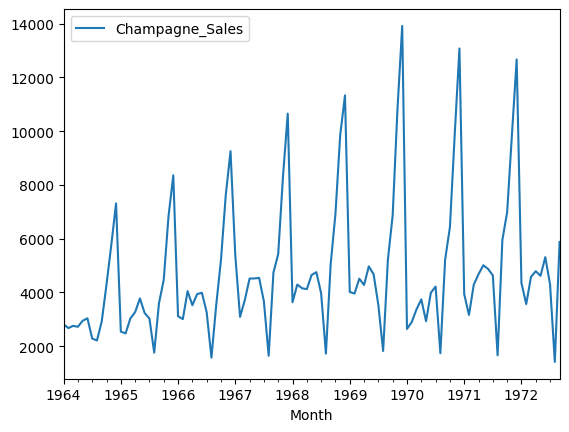

In [58]:
#analysing the data pattern
auto_arima_data.plot()

### **Test for stationary**

In [59]:
#stationary check
stationary_test = ADFTest(alpha=0.05)
stationary_test.should_diff(auto_arima_data)


(0.01, False)

In [60]:
#output shows data is non-stationary, to make data stationary

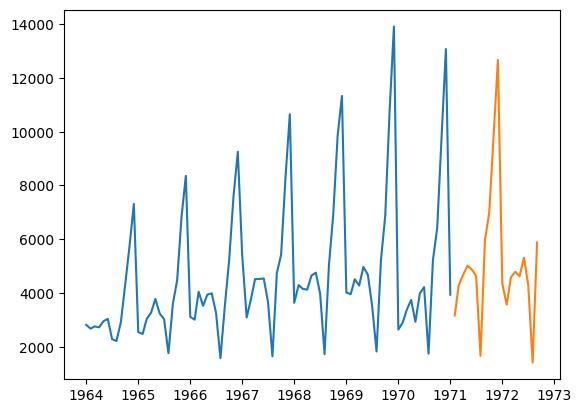

In [62]:
#train test split and plot
train_data = auto_arima_data[:85]
test_data = auto_arima_data[-20:]

plt.plot(train_data)
plt.plot(test_data)


### **Build the Auto-ARIMA model**

In [63]:
#p,q,d non-seasonal component
# P, Q, D seasonal component
#model building with parameters
auto_arima_model = auto_arima(train_data, start_p = 0, d=1,
                              start_q = 0, max_p = 5, max_d = 5,max_q= 5, start_P = 0, D=1,
                              start_Q = 0, max_P = 5, max_D = 5,max_Q= 5, m=12, seasonal = True,
                              error_action = 'warn', trace = True, supress_warnings= True,stepwise = True,
                              random_state =20,n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.73 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.67 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=1.23 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.48 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.07 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.83 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.639, Time=1.45 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.45 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [64]:
#model summary
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Sun, 16 Jun 2024   AIC                           1174.564
Time:                                     22:34:47   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8411      0.152     -5.542      0.000      -1.139      -0.544
ma.L1          0.0512      0.167      0.307      0.759      -0.275       0.378
ma.L2         -0.8673      0.086    -10.133      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.83   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

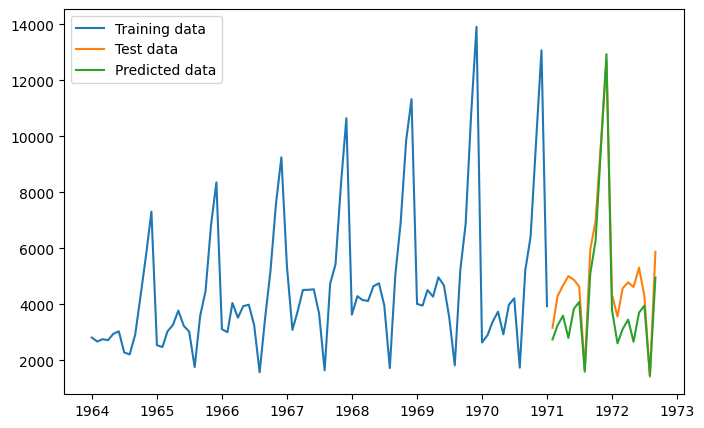

In [66]:
#forecasting using test data
pred = pd.DataFrame(auto_arima_model.predict(n_periods=20), index=test_data.index)

pred.columns = ['pred_sales']

#plot
plt.figure(figsize=(8,5))
plt.plot(train_data, label = 'Training data')
plt.plot(test_data, label = "Test data")
plt.plot(pred, label = "Predicted data")
plt.legend()
plt.show()

In [67]:
#Evaluation of the model
test_data['prediction'] = pred
r2_score(test_data['Champagne_Sales'],test_data['prediction'])


<ipython-input-67-228ce3d8a5ab>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.8114969330335862

# **Multivariate Time Series Forecasting using the VAR (Vector Auto Regressive) model**

In [68]:
#Importing libraries
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR


In [69]:
import requests
import zipfile
import io
import pandas as pd

# URL of the zip file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# Send a HTTP request to the URL
response = requests.get(url)
# Check if the request was successful
if response.status_code == 200:
    # Use io.BytesIO for byte stream and zipfile to unzip
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    # Extract all files from the zip file
    zip_file.extractall(path='path_to_extract')  # You can specify your path here
    # Find the CSV file and read it into a DataFrame
    # The file name might need adjusting based on the actual file name in the zip
    csv_file = 'AirQualityUCI.csv'
    # Assuming the file is directly in the extracted folder
    df = pd.read_csv(f'path_to_extract/{csv_file}', sep=';')  # Check delimiter if needed
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("Failed to retrieve the file")

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT)  ...     T    RH      AH  Unnamed: 15  Unnamed: 16
0  10/03/2004  18.00.00    2,6       1360.0     150.0  ...  13,6  48,9  0,7578          NaN          NaN
1  10/03/2004  19.00.00      2       1292.0     112.0  ...  13,3  47,7  0,7255          NaN          NaN
2  10/03/2004  20.00.00    2,2       1402.0      88.0  ...  11,9  54,0  0,7502          NaN          NaN
3  10/03/2004  21.00.00    2,2       1376.0      80.0  ...  11,0  60,0  0,7867          NaN          NaN
4  10/03/2004  22.00.00    1,6       1272.0      51.0  ...  11,2  59,6  0,7888          NaN          NaN

[5 rows x 17 columns]
